In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [47]:
df = pd.read_csv("Electricity_Capacity.csv", header=None, names=range(47))
table_names = ["Canada", "Newfoundland and Labrador", "Prince Edward Island", "Nova Scotia", "New Brunswick","Quebec", "Ontario","Manitoba", "Alberta", "British Columbia", "Saskatchewan", "Yukon", "Northwest Territories", "Nunavut"]

groups = df[0].isin(table_names).cumsum()

tables = {g.iloc[0,0]: g.iloc[1:-1] for k,g in df.groupby(groups)}

In [48]:
tables2 ={}
for k,v in tables.items(): 
    v.iloc[0,0] = "year"
    v = v.T
    v.columns = v.iloc[0] # set first row as column names
    v = v.iloc[1:] # take all the row except the fisrt one
    #v = v.T
    tables2[k] = v  
  
for k,v in tables2.items():
    print('key:', k)
    #print( v)
  

key: Canada
key: Newfoundland and Labrador
key: Prince Edward Island
key: Nova Scotia
key: New Brunswick
key: Quebec
key: Ontario
key: Manitoba
key: Alberta
key: British Columbia
key: Saskatchewan
key: Yukon
key: Northwest Territories
key: Nunavut


In [49]:
for k, v in tables2.items():
    print(k)
    print(v.isna().sum())
    print('-'*27)
    

Canada
0
year                    0
Hydro / Wave / Tidal    0
Wind                    0
Biomass / Geothermal    0
Solar                   0
Uranium                 0
Coal & Coke             0
Natural Gas             0
Oil                     0
dtype: int64
---------------------------
Newfoundland and Labrador
0
year                     0
Hydro / Wave / Tidal     0
Wind                     0
Biomass / Geothermal    31
Solar                    0
Uranium                 31
Coal & Coke             31
Natural Gas              0
Oil                      0
dtype: int64
---------------------------
Prince Edward Island
0
year                     0
Hydro / Wave / Tidal    31
Wind                     0
Biomass / Geothermal     0
Solar                    0
Uranium                  0
Coal & Coke             31
Natural Gas             31
Oil                      0
dtype: int64
---------------------------
Nova Scotia
0
year                     0
Hydro / Wave / Tidal     0
Wind                     0
Bi

In [50]:
Table_clean ={}
for k, v in tables2.items():
    Table_clean[k] = v.fillna(0)

C:\Users\HOME\AppData\Local\Temp\ipykernel_3408\3461693673.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Table_clean[k] = v.fillna(0)


In [51]:
for k, v in Table_clean.items():
    print(k)
    print(v.isna().sum())
    print('-'*27)

Canada
0
year                    0
Hydro / Wave / Tidal    0
Wind                    0
Biomass / Geothermal    0
Solar                   0
Uranium                 0
Coal & Coke             0
Natural Gas             0
Oil                     0
dtype: int64
---------------------------
Newfoundland and Labrador
0
year                    0
Hydro / Wave / Tidal    0
Wind                    0
Biomass / Geothermal    0
Solar                   0
Uranium                 0
Coal & Coke             0
Natural Gas             0
Oil                     0
dtype: int64
---------------------------
Prince Edward Island
0
year                    0
Hydro / Wave / Tidal    0
Wind                    0
Biomass / Geothermal    0
Solar                   0
Uranium                 0
Coal & Coke             0
Natural Gas             0
Oil                     0
dtype: int64
---------------------------
Nova Scotia
0
year                    0
Hydro / Wave / Tidal    0
Wind                    0
Biomass / Geothermal   

In [52]:
for k, v in Table_clean.items():
    Table_clean[k] = v.drop(v.index[19:])
    print(Table_clean[k])

0     year  Hydro / Wave / Tidal      Wind  Biomass / Geothermal    Solar  \
1   2005.0              72877.98    557.37               1735.59    16.75   
2   2006.0              72767.98   1443.04               1742.19    20.48   
3   2007.0              73568.98   1823.24               1742.19    25.77   
4   2008.0              74471.98   2321.14               1666.19    32.72   
5   2009.0              74753.98   3240.14               1735.29    94.57   
6   2010.0              75148.98   3746.11               1800.29   281.13   
7   2011.0              75464.84   5171.34               1829.79   419.40   
8   2012.0              76520.13   5883.21               1884.89   647.48   
9   2013.0              75991.44   7467.01               1913.73  1027.63   
10  2014.0              78564.85   9404.99               2368.83  1523.48   
11  2015.0              79677.21  10945.79               2236.93  2135.48   
12  2016.0              80624.68  11766.80               2515.50  2416.06   

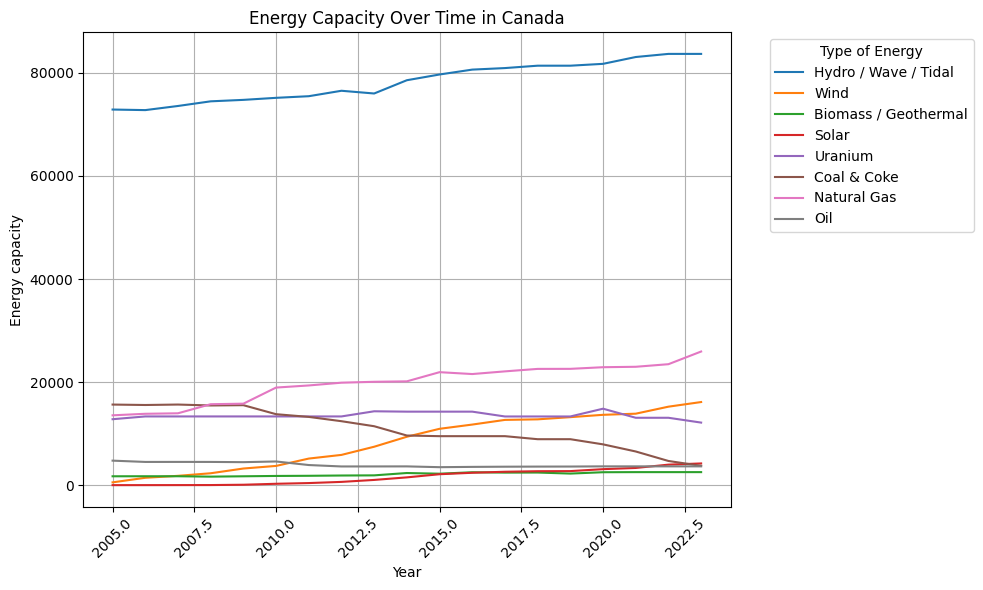

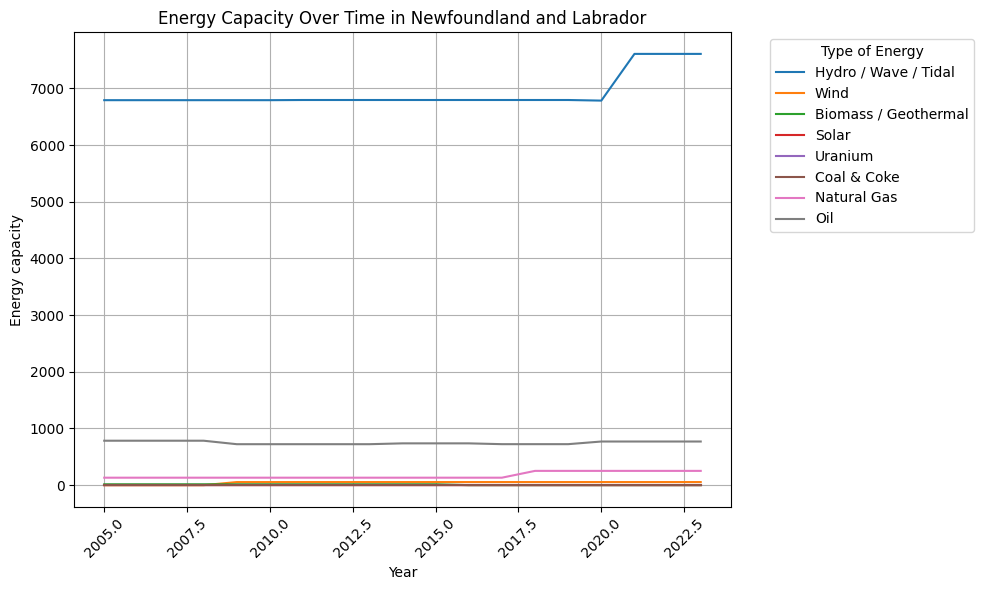

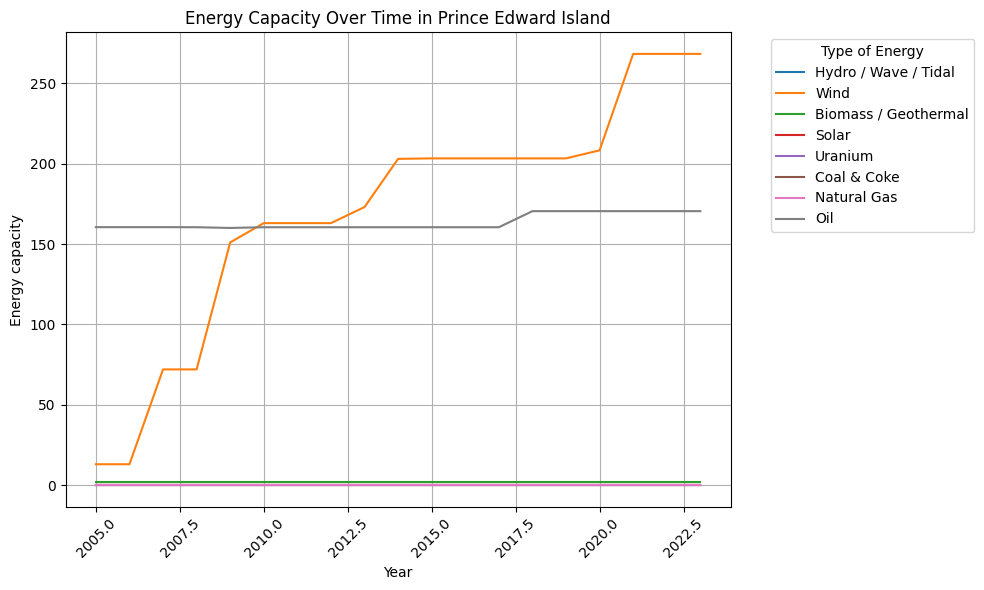

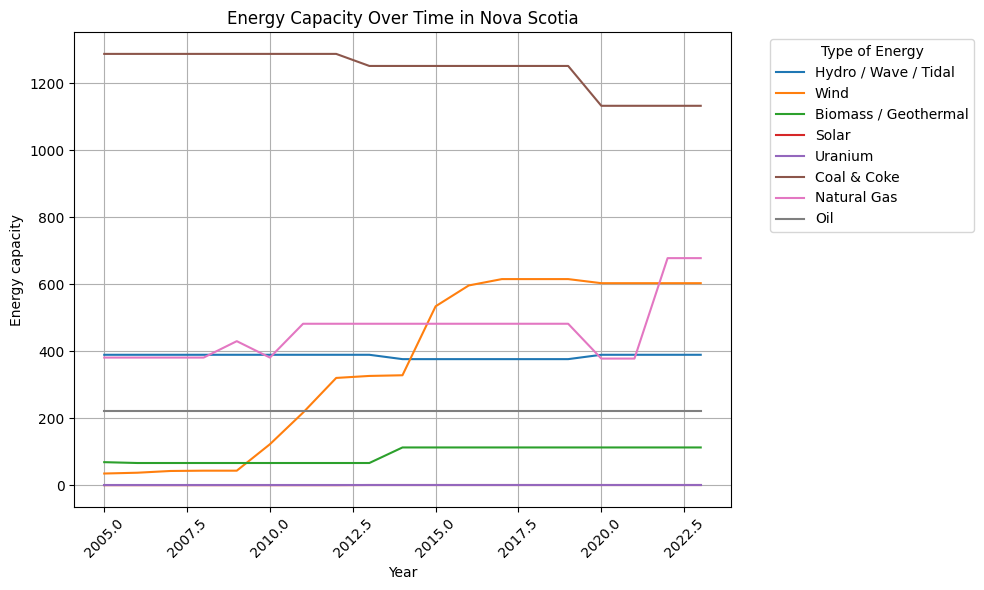

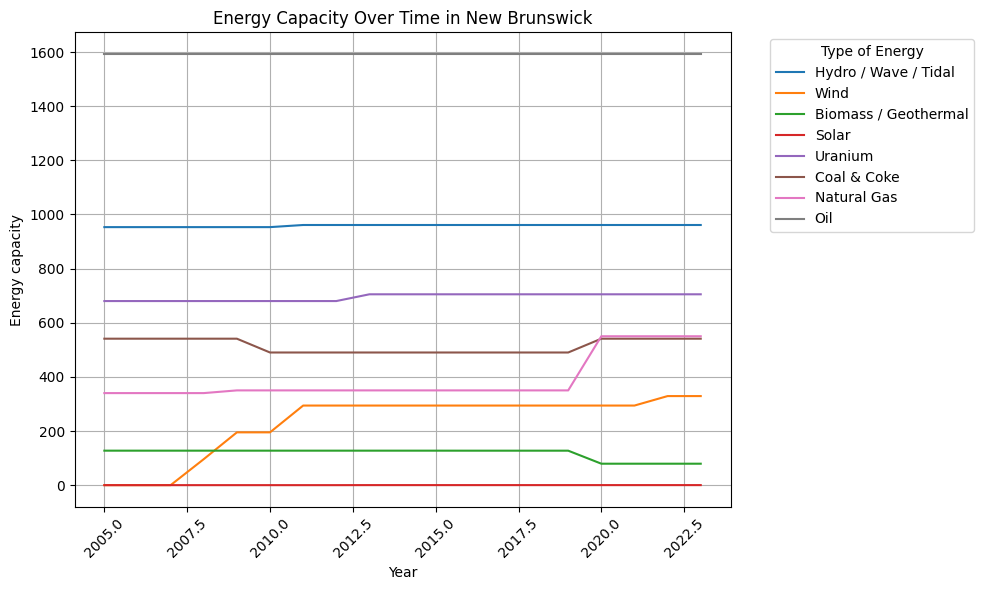

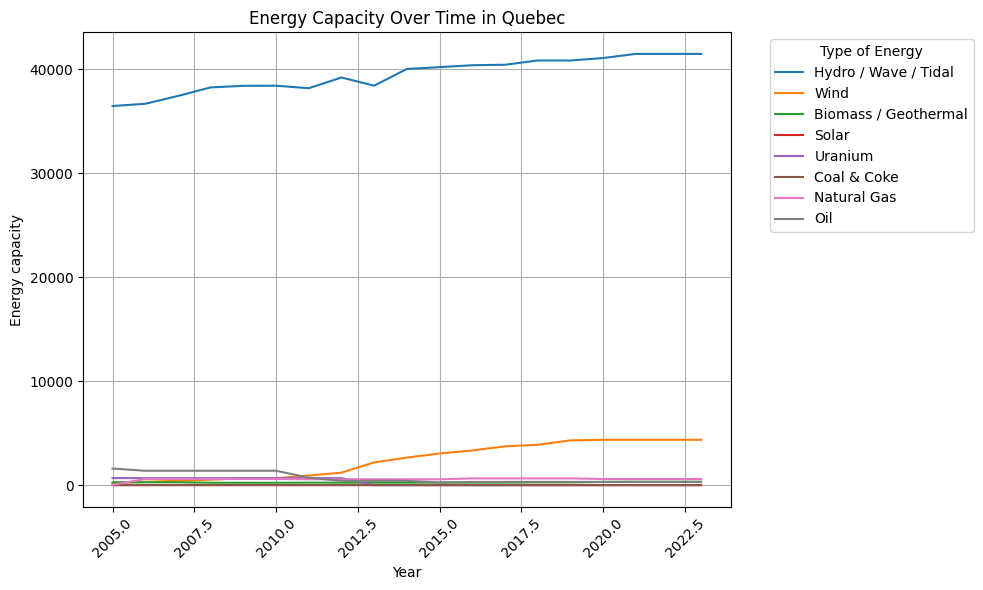

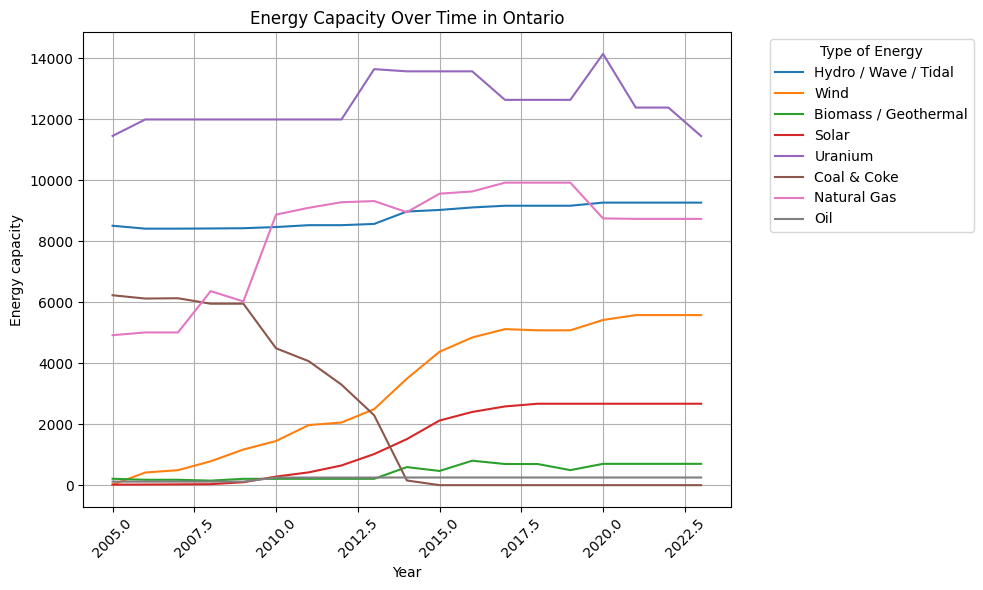

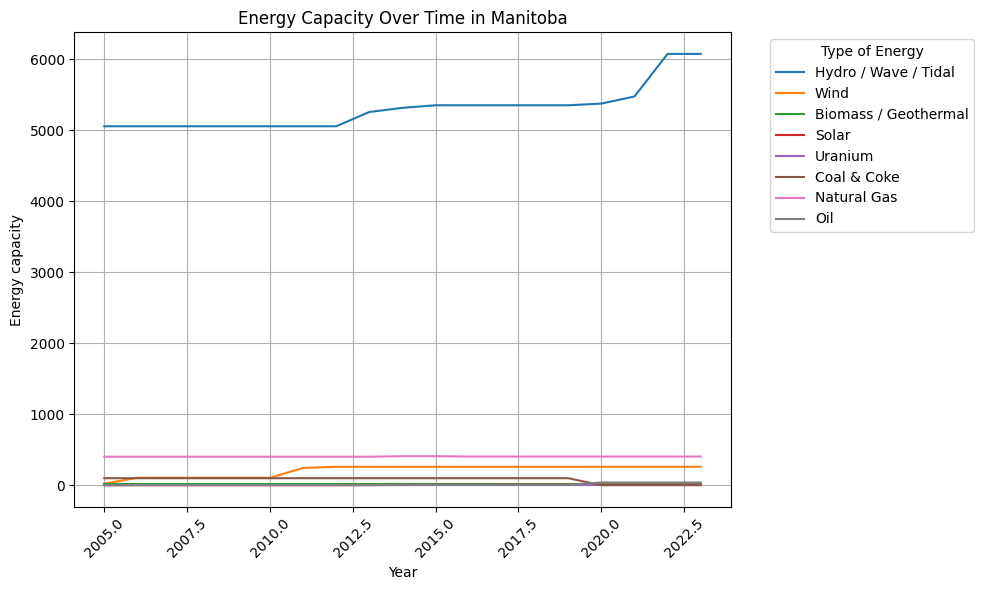

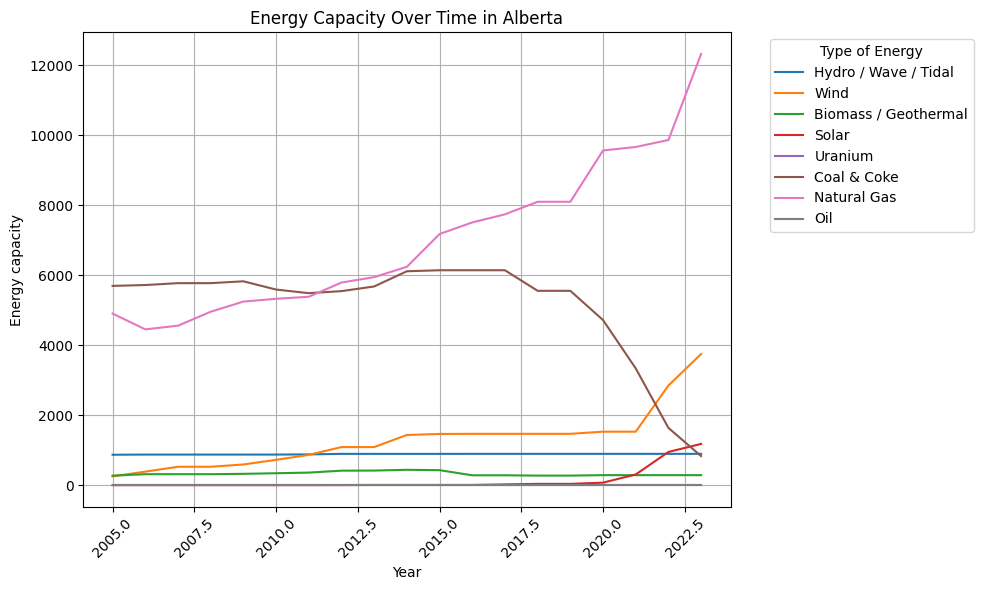

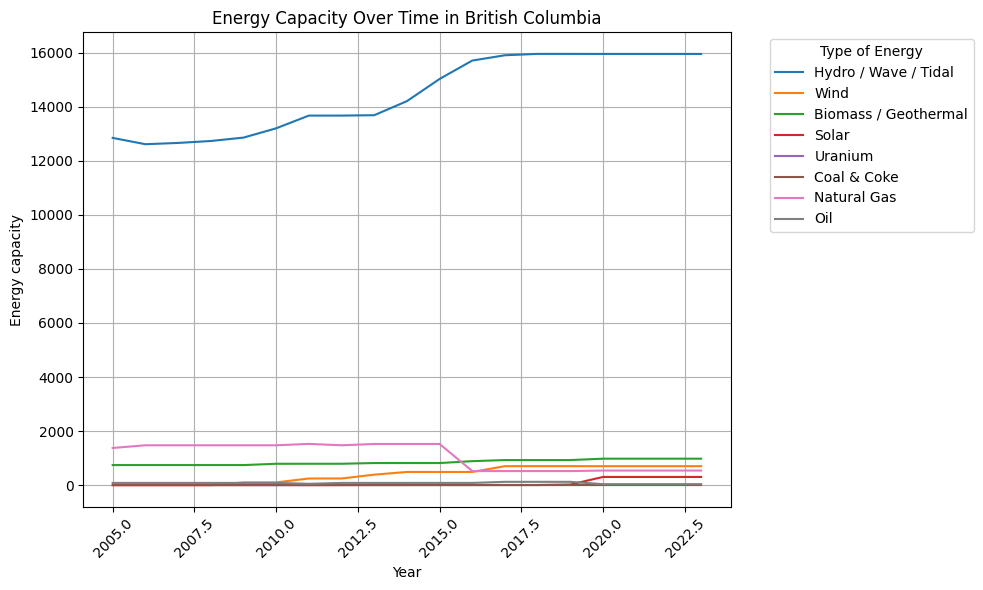

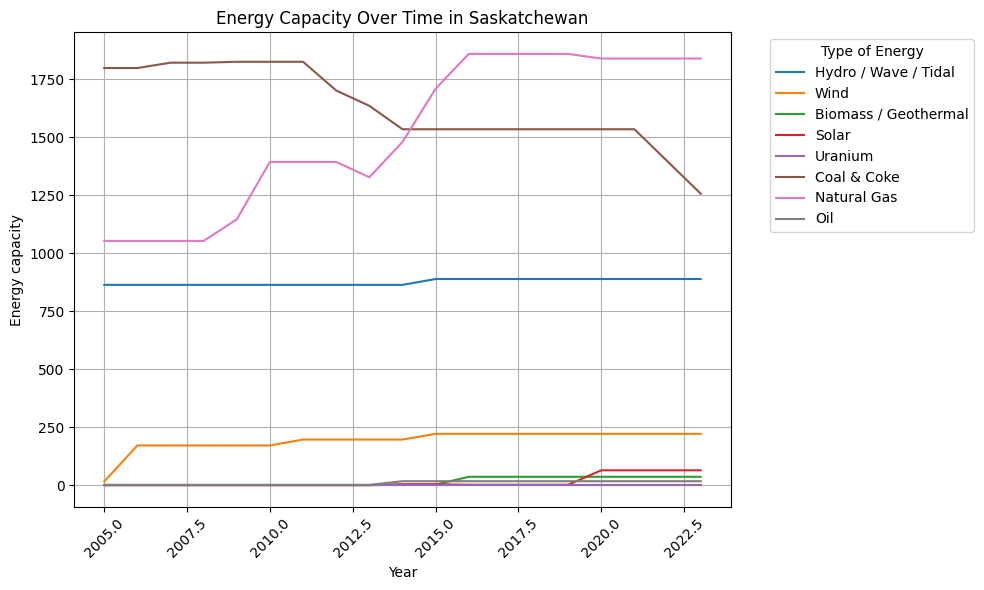

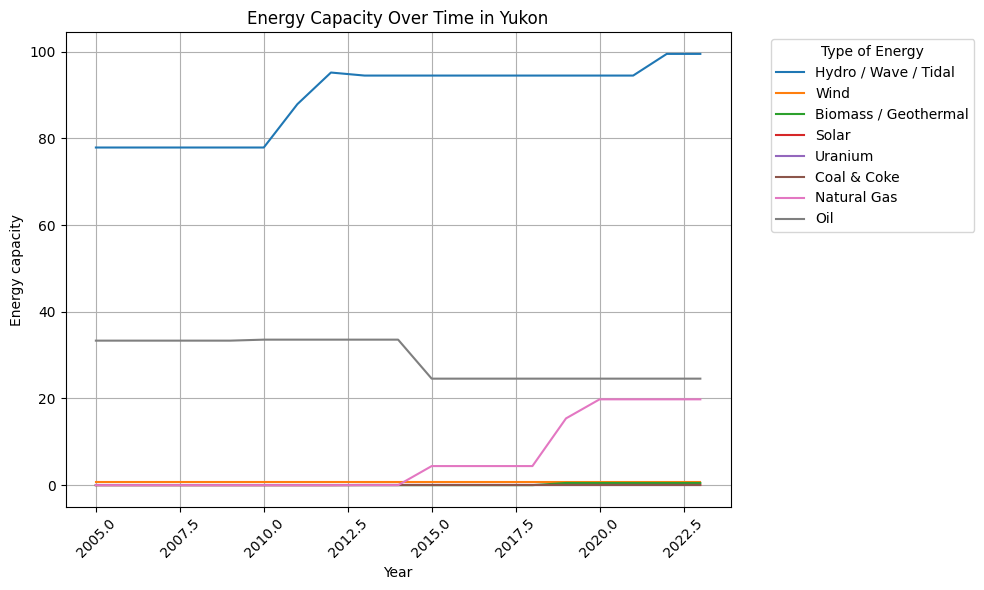

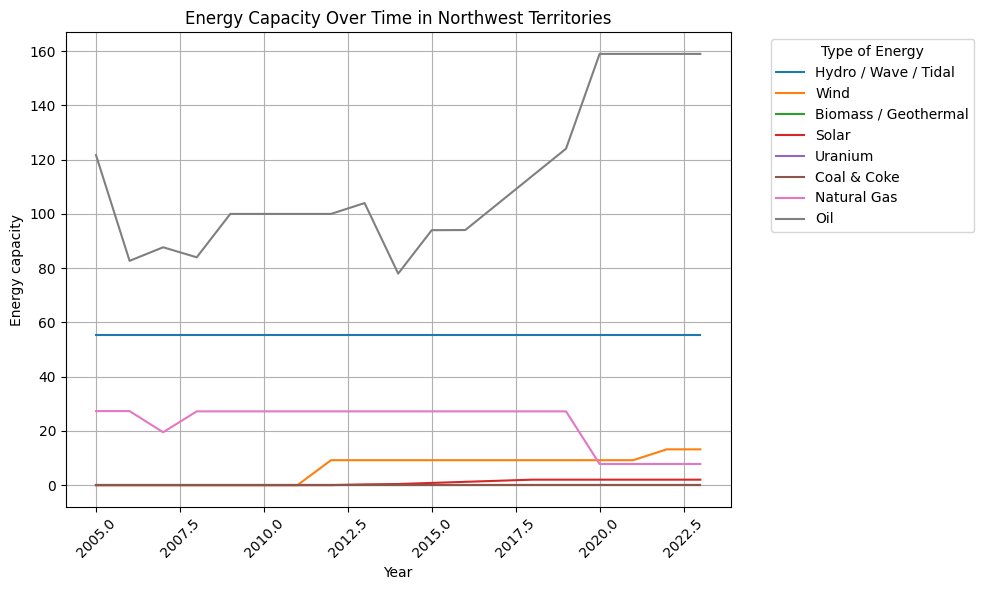

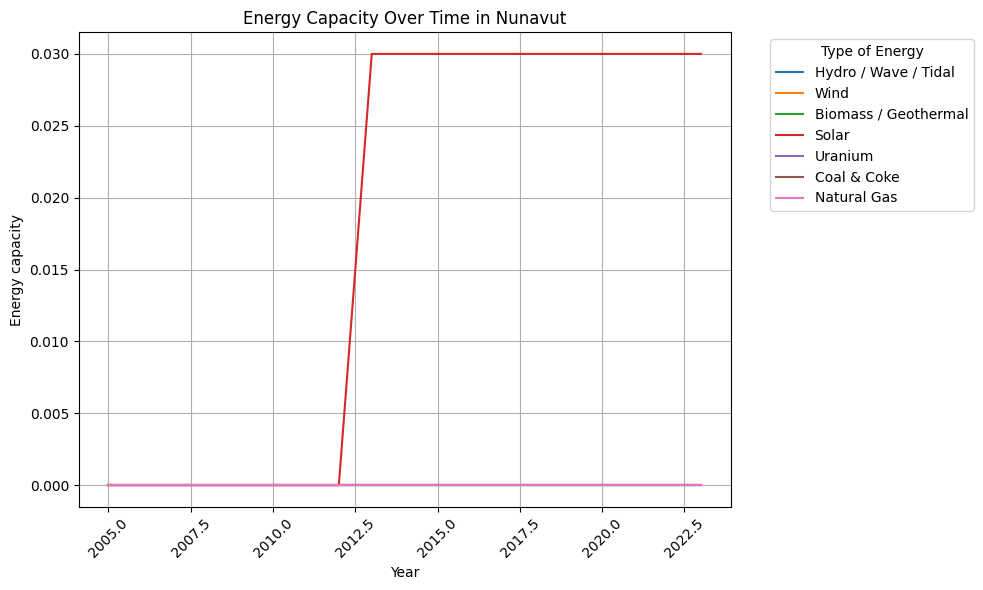

In [53]:
import os

for k, v in Table_clean.items():
    v = v.set_index('year')
    v.plot(kind='line', figsize=(10, 6))
    plt.title(f'Energy Capacity Over Time in {k}')
    plt.xlabel('Year')
    plt.ylabel('Energy capacity')
    plt.xticks( rotation=45)
    plt.grid(True)
    # Show the plot
    plt.legend(title='Type of Energy', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    v = v.T
    v.to_csv(os.path.join("capacity_csv/", f"Capacity in {k}.csv"))
    plt.savefig(os.path.join("capacity_images/", f"Capacity of {k}"), bbox_inches = "tight", dpi=300)
